In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import os
print("Current Dir", os.getcwd())
curr_dir= os.getcwd()

train_path= os.path.join(curr_dir, "dataset", "Train")
test_path= os.path.join(curr_dir, "dataset", "Test")
valid_path= os.path.join(curr_dir, "dataset", "Valid")


Current Dir d:\PythonProject\Potato_Leaf_Disease_Detection_Main


In [3]:
train_set= tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels= "inferred",
    label_mode="categorical",
    color_mode= "rgb",
    image_size= (128, 128),
    shuffle= True,
    interpolation= "bilinear"
)

Found 900 files belonging to 3 classes.


In [4]:
valid_set= tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels= "inferred",
    label_mode="categorical",
    color_mode= "rgb",
    image_size= (128, 128),
    shuffle= True,
    interpolation= "bilinear"
)

Found 300 files belonging to 3 classes.


In [5]:
cnn = tf.keras.models.Sequential()

# Convolutional and pooling layers
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Adding dropout
cnn.add(tf.keras.layers.Dropout(0.25))

# Fully connected layers
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

# Output layer
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))


C:\Users\Agnishwar Das\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.compile(optimizer= tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    12,289,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,006,227 (64.87 MB)

 Trainable params: 17,006,227 (64.87 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
training_history= cnn.fit(x= train_set, validation_data= valid_set, epochs= 25)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.3840 - loss: 2.9036 - val_accuracy: 0.3333 - val_loss: 1.0362
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.4782 - loss: 0.9558 - val_accuracy: 0.8233 - val_loss: 0.4965
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8149 - loss: 0.4427 - val_accuracy: 0.7967 - val_loss: 0.4466
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.8530 - loss: 0.4157 - val_accuracy: 0.8300 - val_loss: 0.4179
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.8733 - loss: 0.2957 - val_accuracy: 0.9000 - val_loss: 0.2225
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9135 - loss: 0.2720 - val_accuracy: 0.9533 - val_loss: 0.1204
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9489 - loss: 0.1378 - val_accuracy: 0.9000 - val_loss: 0.2412
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.8788 - loss: 0.3102 - val_accuracy: 0.9467 - val_loss:

In [9]:
train_loss, train_acc= cnn.evaluate(train_set)
print("Training Accuracy", train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 217ms/step - accuracy: 0.9997 - loss: 0.0030
Training Accuracy 0.9988889098167419


In [11]:
val_loss, val_acc= cnn.evaluate(valid_set)
print("Validation Accuracy", val_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.9600 - loss: 0.1636
Validation Accuracy 0.9633333086967468


In [12]:
cnn.save('Trained_Plant_Disease_Model.keras')   

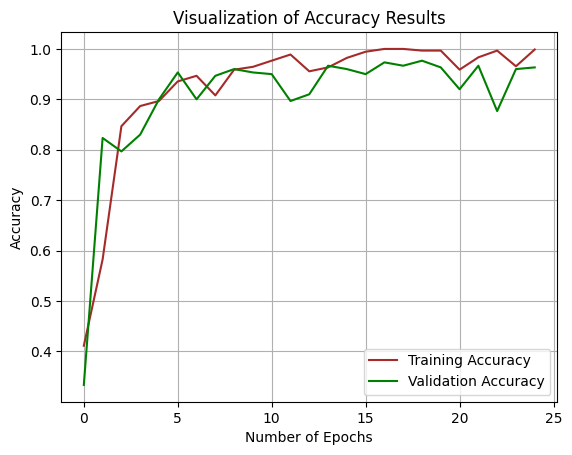

In [18]:
import matplotlib.pyplot as plt

epochs = [i for i in range(0, 25)]

plt.plot(epochs, training_history.history['accuracy'], color='brown', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='green', label='Validation Accuracy')  # Fixed typo

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')  # It's good to label the Y-axis
plt.title('Visualization of Accuracy Results')
plt.legend()
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()
